<a href="https://colab.research.google.com/github/DanB1421/DATA606/blob/main/VaxBots_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
pd.set_option('display.max_rows', 100)

In [ ]:
import re

In [ ]:
patient_data_2023 = pd.read_csv('/content/drive/MyDrive/DATA606 Project/2023VAERSData/2023VAERSDATA.csv', encoding='latin-1')
patient_data_2023 = patient_data_2023.drop(columns=['RECVDATE', 'STATE', 'CAGE_YR', 'CAGE_MO', 'RPT_DATE', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
                                          'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'VAX_DATE', 'ONSET_DATE', 'LAB_DATA', 'V_ADMINBY',
                                          'V_FUNDBY', 'CUR_ILL', 'PRIOR_VAX', 'SPLTTYPE', 'FORM_VERS', 'TODAYS_DATE', 'OFC_VISIT','ER_ED_VISIT'])
patient_data_2023.head()

,VAERS_ID,AGE_YRS,SEX,SYMPTOM_TEXT,RECOVD,NUMDAYS,OTHER_MEDS,HISTORY,BIRTH_DEFECT,ALLERGIES
0,2547730,53.0,F,The adverse event is that the patient went int...,N,NaN,no,NaN,NaN,none
1,2547731,6.0,M,Error: Incorrect Reconstitution-,U,0.0,NaN,NaN,NaN,NaN
2,2547732,38.0,F,Error: Patient Accidentally Stuck by Needle-,Y,0.0,NaN,NaN,NaN,NaN
3,2547733,63.0,M,Error: Dose in Series Given Too Early-,U,0.0,NaN,NaN,NaN,NaN
4,2547734,30.0,F,Systemic: EYE TWITCHING-Medium,N,0.0,NaN,NaN,NaN,NaN


In [ ]:
patient_data_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106089 entries, 0 to 106088
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   VAERS_ID      106089 non-null  int64  
 1   AGE_YRS       87758 non-null   float64
 2   SEX           106089 non-null  object 
 3   SYMPTOM_TEXT  105588 non-null  object 
 4   RECOVD        86301 non-null   object 
 5   NUMDAYS       85053 non-null   float64
 6   OTHER_MEDS    34183 non-null   object 
 7   HISTORY       36706 non-null   object 
 8   BIRTH_DEFECT  45 non-null      object 
 9   ALLERGIES     29386 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 8.1+ MB


In [ ]:
symptom_data_2023 = pd.read_csv('/content/drive/MyDrive/DATA606 Project/2023VAERSData/2023VAERSSYMPTOMS.csv', encoding='latin-1')
symptom_data_2023 = symptom_data_2023.drop(columns=['SYMPTOMVERSION1', 'SYMPTOMVERSION2', 'SYMPTOMVERSION3', 'SYMPTOMVERSION4', 'SYMPTOMVERSION5'])
symptom_data_2023.head()

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
0,2547730,Blood pressure orthostatic abnormal,COVID-19,Coma,Computerised tomogram,Exposure to SARS-CoV-2
1,2547730,Head injury,Headache,Laboratory test,Magnetic resonance imaging,SARS-CoV-2 antibody test negative
2,2547730,SARS-CoV-2 test positive,Unresponsive to stimuli,X-ray,NaN,NaN
3,2547731,Product preparation issue,NaN,NaN,NaN,NaN
4,2547732,Injury associated with device,NaN,NaN,NaN,NaN


In [ ]:
symptom_data_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136730 entries, 0 to 136729
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   VAERS_ID  136730 non-null  int64 
 1   SYMPTOM1  136730 non-null  object
 2   SYMPTOM2  96016 non-null   object
 3   SYMPTOM3  66501 non-null   object
 4   SYMPTOM4  47738 non-null   object
 5   SYMPTOM5  37707 non-null   object
dtypes: int64(1), object(5)
memory usage: 6.3+ MB


In [ ]:
vax_data_2023 = pd.read_csv('/content/drive/MyDrive/DATA606 Project/2023VAERSData/2023VAERSVAX.csv', encoding = 'latin-1')
vax_data_2023 = vax_data_2023.drop(columns=['VAX_LOT', 'VAX_SITE', 'VAX_NAME'])
vax_data_2023.head()

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE
0,2547730,COVID19,JANSSEN,UNK,SYR
1,2547731,COVID19,PFIZER\BIONTECH,3,IM
2,2547732,COVID19-2,MODERNA,4,IM
3,2547733,COVID19,MODERNA,1,IM
4,2547734,TDAP,GLAXOSMITHKLINE BIOLOGICALS,1,IM


In [ ]:
vax_data_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128256 entries, 0 to 128255
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   VAERS_ID         128256 non-null  int64 
 1   VAX_TYPE         128256 non-null  object
 2   VAX_MANU         128256 non-null  object
 3   VAX_DOSE_SERIES  125174 non-null  object
 4   VAX_ROUTE        87623 non-null   object
dtypes: int64(1), object(4)
memory usage: 4.9+ MB


In [ ]:
n = 10
vax_data_2023['VAX_TYPE'].value_counts()[:n].index.tolist()

['COVID19',
 'COVID19-2',
 'VARZOS',
 'FLU4',
 'RSV',
 'UNK',
 'HPV9',
 'TDAP',
 'HEPA',
 'HEP']

In [ ]:
vax_data_2023[vax_data_2023.VAX_TYPE == 'UNK'].shape[0]

2875

In [ ]:
mask = vax_data_2023['VAX_TYPE'] == 'UNK'
vax_data_2023 = vax_data_2023[~mask]

In [ ]:
vax_data_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125381 entries, 0 to 128255
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   VAERS_ID         125381 non-null  int64 
 1   VAX_TYPE         125381 non-null  object
 2   VAX_MANU         125381 non-null  object
 3   VAX_DOSE_SERIES  122391 non-null  object
 4   VAX_ROUTE        86184 non-null   object
dtypes: int64(1), object(4)
memory usage: 5.7+ MB


In [ ]:
master_data_2023 = pd.merge(patient_data_2023, symptom_data_2023, how='inner', on='VAERS_ID')
master_data_2023.head()

,VAERS_ID,AGE_YRS,SEX,SYMPTOM_TEXT,RECOVD,NUMDAYS,OTHER_MEDS,HISTORY,BIRTH_DEFECT,ALLERGIES,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
0,2547730,53.0,F,The adverse event is that the patient went int...,N,NaN,no,NaN,NaN,none,Blood pressure orthostatic abnormal,COVID-19,Coma,Computerised tomogram,Exposure to SARS-CoV-2
1,2547730,53.0,F,The adverse event is that the patient went int...,N,NaN,no,NaN,NaN,none,Head injury,Headache,Laboratory test,Magnetic resonance imaging,SARS-CoV-2 antibody test negative
2,2547730,53.0,F,The adverse event is that the patient went int...,N,NaN,no,NaN,NaN,none,SARS-CoV-2 test positive,Unresponsive to stimuli,X-ray,NaN,NaN
3,2547731,6.0,M,Error: Incorrect Reconstitution-,U,0.0,NaN,NaN,NaN,NaN,Product preparation issue,NaN,NaN,NaN,NaN
4,2547732,38.0,F,Error: Patient Accidentally Stuck by Needle-,Y,0.0,NaN,NaN,NaN,NaN,Injury associated with device,NaN,NaN,NaN,NaN


In [ ]:
master_data_2023 = pd.merge(master_data_2023, vax_data_2023, how='inner', on='VAERS_ID')
master_data_2023.head()

,VAERS_ID,AGE_YRS,SEX,SYMPTOM_TEXT,RECOVD,NUMDAYS,OTHER_MEDS,HISTORY,BIRTH_DEFECT,ALLERGIES,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE
0,2547730,53.0,F,The adverse event is that the patient went int...,N,NaN,no,NaN,NaN,none,Blood pressure orthostatic abnormal,COVID-19,Coma,Computerised tomogram,Exposure to SARS-CoV-2,COVID19,JANSSEN,UNK,SYR
1,2547730,53.0,F,The adverse event is that the patient went int...,N,NaN,no,NaN,NaN,none,Head injury,Headache,Laboratory test,Magnetic resonance imaging,SARS-CoV-2 antibody test negative,COVID19,JANSSEN,UNK,SYR
2,2547730,53.0,F,The adverse event is that the patient went int...,N,NaN,no,NaN,NaN,none,SARS-CoV-2 test positive,Unresponsive to stimuli,X-ray,NaN,NaN,COVID19,JANSSEN,UNK,SYR
3,2547731,6.0,M,Error: Incorrect Reconstitution-,U,0.0,NaN,NaN,NaN,NaN,Product preparation issue,NaN,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,3,IM
4,2547732,38.0,F,Error: Patient Accidentally Stuck by Needle-,Y,0.0,NaN,NaN,NaN,NaN,Injury associated with device,NaN,NaN,NaN,NaN,COVID19-2,MODERNA,4,IM


In [ ]:
master_data_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163194 entries, 0 to 163193
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   VAERS_ID         163194 non-null  int64  
 1   AGE_YRS          140639 non-null  float64
 2   SEX              163194 non-null  object 
 3   SYMPTOM_TEXT     162533 non-null  object 
 4   RECOVD           135072 non-null  object 
 5   NUMDAYS          135827 non-null  float64
 6   OTHER_MEDS       65451 non-null   object 
 7   HISTORY          69658 non-null   object 
 8   BIRTH_DEFECT     142 non-null     object 
 9   ALLERGIES        56651 non-null   object 
 10  SYMPTOM1         163194 non-null  object 
 11  SYMPTOM2         117592 non-null  object 
 12  SYMPTOM3         81849 non-null   object 
 13  SYMPTOM4         58912 non-null   object 
 14  SYMPTOM5         46436 non-null   object 
 15  VAX_TYPE         163194 non-null  object 
 16  VAX_MANU         163194 non-null  obje

In [ ]:
patient_data_2022 = pd.read_csv('/content/drive/MyDrive/DATA606 Project/2022VAERSData/2022VAERSDATA.csv', encoding='latin-1')
patient_data_2022 = patient_data_2022.drop(columns=['RECVDATE', 'STATE', 'CAGE_YR', 'CAGE_MO', 'RPT_DATE', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
                                          'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'VAX_DATE', 'ONSET_DATE', 'LAB_DATA', 'V_ADMINBY',
                                          'V_FUNDBY', 'CUR_ILL', 'PRIOR_VAX', 'SPLTTYPE', 'FORM_VERS', 'TODAYS_DATE', 'OFC_VISIT','ER_ED_VISIT'])
patient_data_2022.head()

<ipython-input-18-d981252c7afa>:1: DtypeWarning: Columns (7,12,23) have mixed types. Specify dtype option on import or set low_memory=False.
  patient_data_2022 = pd.read_csv('/content/drive/MyDrive/DATA606 Project/2022VAERSData/2022VAERSDATA.csv', encoding='latin-1')


,VAERS_ID,AGE_YRS,SEX,SYMPTOM_TEXT,RECOVD,NUMDAYS,OTHER_MEDS,HISTORY,BIRTH_DEFECT,ALLERGIES
0,1996873,NaN,U,This spontaneous report was received from a ph...,U,0.0,NaN,NaN,NaN,NaN
1,1996874,NaN,U,SUSPECTED CLINICAL VACCINATION FAILURE; SUSPEC...,U,NaN,NaN,NaN,NaN,NaN
2,1996875,NaN,M,SUSPECTED CLINICAL VACCINATION FAILURE; SUSPEC...,U,NaN,NaN,NaN,NaN,NaN
3,1996876,34.0,F,Irregular menstrual cycle.; period extremely h...,N,16.0,ZOLOFT; ORTHO-TRI-CYCLEN LO,Comments: List of non-encoded Patient Relevant...,NaN,NaN
4,1996877,NaN,F,Breakthrough and heavy periods; longer period ...,N,73.0,ALDACTONE [SPIRONOLACTONE],NaN,NaN,NaN


In [ ]:
patient_data_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246817 entries, 0 to 246816
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   VAERS_ID      246817 non-null  int64  
 1   AGE_YRS       211028 non-null  float64
 2   SEX           246817 non-null  object 
 3   SYMPTOM_TEXT  246177 non-null  object 
 4   RECOVD        202516 non-null  object 
 5   NUMDAYS       197699 non-null  float64
 6   OTHER_MEDS    92243 non-null   object 
 7   HISTORY       97755 non-null   object 
 8   BIRTH_DEFECT  143 non-null     object 
 9   ALLERGIES     71965 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 18.8+ MB


In [ ]:
symptom_data_2022 = pd.read_csv('/content/drive/MyDrive/DATA606 Project/2022VAERSData/2022VAERSSYMPTOMS.csv', encoding='latin-1')
symptom_data_2022 = symptom_data_2022.drop(columns=['SYMPTOMVERSION1', 'SYMPTOMVERSION2', 'SYMPTOMVERSION3', 'SYMPTOMVERSION4', 'SYMPTOMVERSION5'])
symptom_data_2022.head()

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
0,1996873,Expired product administered,No adverse event,NaN,NaN,NaN
1,1996874,Suspected COVID-19,Vaccination failure,NaN,NaN,NaN
2,1996875,SARS-CoV-2 test,Suspected COVID-19,Vaccination failure,NaN,NaN
3,1996876,Dysmenorrhoea,Heavy menstrual bleeding,Menstruation irregular,NaN,NaN
4,1996877,Heavy menstrual bleeding,Oligomenorrhoea,SARS-CoV-2 test negative,NaN,NaN


In [ ]:
symptom_data_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329406 entries, 0 to 329405
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   VAERS_ID  329406 non-null  int64 
 1   SYMPTOM1  329406 non-null  object
 2   SYMPTOM2  241592 non-null  object
 3   SYMPTOM3  171901 non-null  object
 4   SYMPTOM4  128161 non-null  object
 5   SYMPTOM5  101995 non-null  object
dtypes: int64(1), object(5)
memory usage: 15.1+ MB


In [ ]:
vax_data_2022 = pd.read_csv('/content/drive/MyDrive/DATA606 Project/2022VAERSData/2022VAERSVAX.csv', encoding = 'latin-1')
vax_data_2022 = vax_data_2022.drop(columns=['VAX_LOT', 'VAX_SITE', 'VAX_NAME'])
vax_data_2022.head()

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE
0,1996873,HPV9,MERCK & CO. INC.,UNK,NaN
1,1996874,COVID19,JANSSEN,1,OT
2,1996875,COVID19,JANSSEN,1,NaN
3,1996876,COVID19,PFIZER\BIONTECH,2,NaN
4,1996877,COVID19,PFIZER\BIONTECH,1,NaN


In [ ]:
vax_data_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283426 entries, 0 to 283425
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   VAERS_ID         283426 non-null  int64 
 1   VAX_TYPE         283426 non-null  object
 2   VAX_MANU         283426 non-null  object
 3   VAX_DOSE_SERIES  280596 non-null  object
 4   VAX_ROUTE        199399 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.8+ MB


In [ ]:
n = 10
vax_data_2022['VAX_TYPE'].value_counts()[:n].index.tolist()

['COVID19',
 'COVID19-2',
 'VARZOS',
 'FLU4',
 'UNK',
 'TDAP',
 'VARCEL',
 'FLUX',
 'HEPA',
 'SMALLMNK']

In [ ]:
vax_data_2022[vax_data_2022.VAX_TYPE == 'UNK'].shape[0]

5795

In [ ]:
mask = vax_data_2022['VAX_TYPE'] == 'UNK'
vax_data_2022 = vax_data_2022[~mask]

In [ ]:
vax_data_2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277631 entries, 0 to 283424
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   VAERS_ID         277631 non-null  int64 
 1   VAX_TYPE         277631 non-null  object
 2   VAX_MANU         277631 non-null  object
 3   VAX_DOSE_SERIES  274878 non-null  object
 4   VAX_ROUTE        195968 non-null  object
dtypes: int64(1), object(4)
memory usage: 12.7+ MB


In [ ]:
master_data_2022 = pd.merge(patient_data_2022, symptom_data_2022, how='inner', on='VAERS_ID')
master_data_2022.head()

,VAERS_ID,AGE_YRS,SEX,SYMPTOM_TEXT,RECOVD,NUMDAYS,OTHER_MEDS,HISTORY,BIRTH_DEFECT,ALLERGIES,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
0,1996873,NaN,U,This spontaneous report was received from a ph...,U,0.0,NaN,NaN,NaN,NaN,Expired product administered,No adverse event,NaN,NaN,NaN
1,1996874,NaN,U,SUSPECTED CLINICAL VACCINATION FAILURE; SUSPEC...,U,NaN,NaN,NaN,NaN,NaN,Suspected COVID-19,Vaccination failure,NaN,NaN,NaN
2,1996875,NaN,M,SUSPECTED CLINICAL VACCINATION FAILURE; SUSPEC...,U,NaN,NaN,NaN,NaN,NaN,SARS-CoV-2 test,Suspected COVID-19,Vaccination failure,NaN,NaN
3,1996876,34.0,F,Irregular menstrual cycle.; period extremely h...,N,16.0,ZOLOFT; ORTHO-TRI-CYCLEN LO,Comments: List of non-encoded Patient Relevant...,NaN,NaN,Dysmenorrhoea,Heavy menstrual bleeding,Menstruation irregular,NaN,NaN
4,1996877,NaN,F,Breakthrough and heavy periods; longer period ...,N,73.0,ALDACTONE [SPIRONOLACTONE],NaN,NaN,NaN,Heavy menstrual bleeding,Oligomenorrhoea,SARS-CoV-2 test negative,NaN,NaN


In [ ]:
master_data_2022 = pd.merge(master_data_2022, vax_data_2022, how='inner', on='VAERS_ID')
master_data_2022.head()

,VAERS_ID,AGE_YRS,SEX,SYMPTOM_TEXT,RECOVD,NUMDAYS,OTHER_MEDS,HISTORY,BIRTH_DEFECT,ALLERGIES,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE
0,1996873,NaN,U,This spontaneous report was received from a ph...,U,0.0,NaN,NaN,NaN,NaN,Expired product administered,No adverse event,NaN,NaN,NaN,HPV9,MERCK & CO. INC.,UNK,NaN
1,1996874,NaN,U,SUSPECTED CLINICAL VACCINATION FAILURE; SUSPEC...,U,NaN,NaN,NaN,NaN,NaN,Suspected COVID-19,Vaccination failure,NaN,NaN,NaN,COVID19,JANSSEN,1,OT
2,1996875,NaN,M,SUSPECTED CLINICAL VACCINATION FAILURE; SUSPEC...,U,NaN,NaN,NaN,NaN,NaN,SARS-CoV-2 test,Suspected COVID-19,Vaccination failure,NaN,NaN,COVID19,JANSSEN,1,NaN
3,1996876,34.0,F,Irregular menstrual cycle.; period extremely h...,N,16.0,ZOLOFT; ORTHO-TRI-CYCLEN LO,Comments: List of non-encoded Patient Relevant...,NaN,NaN,Dysmenorrhoea,Heavy menstrual bleeding,Menstruation irregular,NaN,NaN,COVID19,PFIZER\BIONTECH,2,NaN
4,1996877,NaN,F,Breakthrough and heavy periods; longer period ...,N,73.0,ALDACTONE [SPIRONOLACTONE],NaN,NaN,NaN,Heavy menstrual bleeding,Oligomenorrhoea,SARS-CoV-2 test negative,NaN,NaN,COVID19,PFIZER\BIONTECH,1,NaN


In [ ]:
master_data_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377143 entries, 0 to 377142
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   VAERS_ID         377143 non-null  int64  
 1   AGE_YRS          334584 non-null  float64
 2   SEX              377143 non-null  object 
 3   SYMPTOM_TEXT     376447 non-null  object 
 4   RECOVD           316285 non-null  object 
 5   NUMDAYS          316344 non-null  float64
 6   OTHER_MEDS       169875 non-null  object 
 7   HISTORY          183256 non-null  object 
 8   BIRTH_DEFECT     317 non-null     object 
 9   ALLERGIES        142360 non-null  object 
 10  SYMPTOM1         377143 non-null  object 
 11  SYMPTOM2         282643 non-null  object 
 12  SYMPTOM3         204284 non-null  object 
 13  SYMPTOM4         152670 non-null  object 
 14  SYMPTOM5         122138 non-null  object 
 15  VAX_TYPE         377143 non-null  object 
 16  VAX_MANU         377143 non-null  obje

In [ ]:
patient_data_2021 = pd.read_csv('/content/drive/MyDrive/DATA606 Project/2021VAERSData/2021VAERSDATA.csv', encoding='latin-1')
patient_data_2021 = patient_data_2021.drop(columns=['RECVDATE', 'STATE', 'CAGE_YR', 'CAGE_MO', 'RPT_DATE', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
                                          'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'VAX_DATE', 'ONSET_DATE', 'LAB_DATA', 'V_ADMINBY',
                                          'V_FUNDBY', 'CUR_ILL','PRIOR_VAX', 'SPLTTYPE', 'FORM_VERS', 'TODAYS_DATE', 'OFC_VISIT','ER_ED_VISIT'])
patient_data_2021.head()

<ipython-input-31-5181a3a100b7>:1: DtypeWarning: Columns (7,12,15,23) have mixed types. Specify dtype option on import or set low_memory=False.
  patient_data_2021 = pd.read_csv('/content/drive/MyDrive/DATA606 Project/2021VAERSData/2021VAERSDATA.csv', encoding='latin-1')


,VAERS_ID,AGE_YRS,SEX,SYMPTOM_TEXT,RECOVD,NUMDAYS,OTHER_MEDS,HISTORY,BIRTH_DEFECT,ALLERGIES
0,916600,33.0,F,Right side of epiglottis swelled up and hinder...,Y,2.0,NaN,NaN,NaN,Pcn and bee venom
1,916601,73.0,F,Approximately 30 min post vaccination administ...,Y,0.0,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,"""Dairy"""
2,916602,23.0,F,"About 15 minutes after receiving the vaccine, ...",U,0.0,NaN,NaN,NaN,Shellfish
3,916603,58.0,F,"extreme fatigue, dizziness,. could not lift my...",Y,0.0,none,"diverticulitis, mitral valve prolapse, osteoar...",NaN,"Diclofenac, novacaine, lidocaine, pickles, tom..."
4,916604,47.0,F,"Injection site swelling, redness, warm to the ...",N,7.0,Na,NaN,NaN,Na


In [ ]:
patient_data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753042 entries, 0 to 753041
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   VAERS_ID      753042 non-null  int64  
 1   AGE_YRS       671962 non-null  float64
 2   SEX           753042 non-null  object 
 3   SYMPTOM_TEXT  752465 non-null  object 
 4   RECOVD        679614 non-null  object 
 5   NUMDAYS       658455 non-null  float64
 6   OTHER_MEDS    372111 non-null  object 
 7   HISTORY       374858 non-null  object 
 8   BIRTH_DEFECT  459 non-null     object 
 9   ALLERGIES     298538 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 57.5+ MB


In [ ]:
symptom_data_2021 = pd.read_csv('/content/drive/MyDrive/DATA606 Project/2021VAERSData/2021VAERSSYMPTOMS.csv', encoding='latin-1')
symptom_data_2021 = symptom_data_2021.drop(columns=['SYMPTOMVERSION1', 'SYMPTOMVERSION2', 'SYMPTOMVERSION3', 'SYMPTOMVERSION4', 'SYMPTOMVERSION5'])
symptom_data_2021.head()

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
0,910642,Dyspnoea,Heart rate increased,SARS-CoV-2 test negative,NaN,NaN
1,916600,Dysphagia,Epiglottitis,NaN,NaN,NaN
2,916601,Anxiety,Dyspnoea,NaN,NaN,NaN
3,916602,Chest discomfort,Dysphagia,Pain in extremity,Visual impairment,NaN
4,916603,Dizziness,Fatigue,Mobility decreased,NaN,NaN


In [ ]:
symptom_data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003851 entries, 0 to 1003850
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   VAERS_ID  1003851 non-null  int64 
 1   SYMPTOM1  1003851 non-null  object
 2   SYMPTOM2  778266 non-null   object
 3   SYMPTOM3  595519 non-null   object
 4   SYMPTOM4  452338 non-null   object
 5   SYMPTOM5  337896 non-null   object
dtypes: int64(1), object(5)
memory usage: 46.0+ MB


In [ ]:
vax_data_2021 = pd.read_csv('/content/drive/MyDrive/DATA606 Project/2021VAERSData/2021VAERSVAX.csv', encoding = 'latin-1')
vax_data_2021 = vax_data_2021.drop(columns=['VAX_LOT', 'VAX_SITE', 'VAX_NAME'])
vax_data_2021.head()

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE
0,910642,COVID19,PFIZER\BIONTECH,1,NaN
1,916600,COVID19,MODERNA,1,IM
2,916601,COVID19,MODERNA,1,IM
3,916602,COVID19,PFIZER\BIONTECH,1,IM
4,916603,COVID19,MODERNA,UNK,NaN


In [ ]:
vax_data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797112 entries, 0 to 797111
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   VAERS_ID         797112 non-null  int64 
 1   VAX_TYPE         797112 non-null  object
 2   VAX_MANU         797112 non-null  object
 3   VAX_DOSE_SERIES  792943 non-null  object
 4   VAX_ROUTE        606913 non-null  object
dtypes: int64(1), object(4)
memory usage: 30.4+ MB


In [ ]:
n = 10
vax_data_2021['VAX_TYPE'].value_counts()[:n].index.tolist()

['COVID19',
 'VARZOS',
 'UNK',
 'FLU4',
 'HPV9',
 'VARCEL',
 'TDAP',
 'PPV',
 'HEPA',
 'FLUX']

In [ ]:
vax_data_2021[vax_data_2021.VAX_TYPE == 'UNK'].shape[0]

9458

In [ ]:
mask = vax_data_2021['VAX_TYPE'] == 'UNK'
vax_data_2021 = vax_data_2021[~mask]

In [ ]:
vax_data_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 787654 entries, 0 to 797111
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   VAERS_ID         787654 non-null  int64 
 1   VAX_TYPE         787654 non-null  object
 2   VAX_MANU         787654 non-null  object
 3   VAX_DOSE_SERIES  783567 non-null  object
 4   VAX_ROUTE        602656 non-null  object
dtypes: int64(1), object(4)
memory usage: 36.1+ MB


In [ ]:
master_data_2021 = pd.merge(patient_data_2021, symptom_data_2021, how='inner', on='VAERS_ID')
master_data_2021.head()

,VAERS_ID,AGE_YRS,SEX,SYMPTOM_TEXT,RECOVD,NUMDAYS,OTHER_MEDS,HISTORY,BIRTH_DEFECT,ALLERGIES,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
0,916600,33.0,F,Right side of epiglottis swelled up and hinder...,Y,2.0,NaN,NaN,NaN,Pcn and bee venom,Dysphagia,Epiglottitis,NaN,NaN,NaN
1,916601,73.0,F,Approximately 30 min post vaccination administ...,Y,0.0,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,"""Dairy""",Anxiety,Dyspnoea,NaN,NaN,NaN
2,916602,23.0,F,"About 15 minutes after receiving the vaccine, ...",U,0.0,NaN,NaN,NaN,Shellfish,Chest discomfort,Dysphagia,Pain in extremity,Visual impairment,NaN
3,916603,58.0,F,"extreme fatigue, dizziness,. could not lift my...",Y,0.0,none,"diverticulitis, mitral valve prolapse, osteoar...",NaN,"Diclofenac, novacaine, lidocaine, pickles, tom...",Dizziness,Fatigue,Mobility decreased,NaN,NaN
4,916604,47.0,F,"Injection site swelling, redness, warm to the ...",N,7.0,Na,NaN,NaN,Na,Injection site erythema,Injection site pruritus,Injection site swelling,Injection site warmth,NaN


In [ ]:
master_data_2021 = pd.merge(master_data_2021, vax_data_2021, how='inner', on='VAERS_ID')
master_data_2021.head()

,VAERS_ID,AGE_YRS,SEX,SYMPTOM_TEXT,RECOVD,NUMDAYS,OTHER_MEDS,HISTORY,BIRTH_DEFECT,ALLERGIES,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE
0,916600,33.0,F,Right side of epiglottis swelled up and hinder...,Y,2.0,NaN,NaN,NaN,Pcn and bee venom,Dysphagia,Epiglottitis,NaN,NaN,NaN,COVID19,MODERNA,1,IM
1,916601,73.0,F,Approximately 30 min post vaccination administ...,Y,0.0,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,"""Dairy""",Anxiety,Dyspnoea,NaN,NaN,NaN,COVID19,MODERNA,1,IM
2,916602,23.0,F,"About 15 minutes after receiving the vaccine, ...",U,0.0,NaN,NaN,NaN,Shellfish,Chest discomfort,Dysphagia,Pain in extremity,Visual impairment,NaN,COVID19,PFIZER\BIONTECH,1,IM
3,916603,58.0,F,"extreme fatigue, dizziness,. could not lift my...",Y,0.0,none,"diverticulitis, mitral valve prolapse, osteoar...",NaN,"Diclofenac, novacaine, lidocaine, pickles, tom...",Dizziness,Fatigue,Mobility decreased,NaN,NaN,COVID19,MODERNA,UNK,NaN
4,916604,47.0,F,"Injection site swelling, redness, warm to the ...",N,7.0,Na,NaN,NaN,Na,Injection site erythema,Injection site pruritus,Injection site swelling,Injection site warmth,NaN,COVID19,MODERNA,1,IM


In [ ]:
master_data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057957 entries, 0 to 1057956
Data columns (total 19 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   VAERS_ID         1057957 non-null  int64  
 1   AGE_YRS          964571 non-null   float64
 2   SEX              1057957 non-null  object 
 3   SYMPTOM_TEXT     1057350 non-null  object 
 4   RECOVD           966898 non-null   object 
 5   NUMDAYS          942250 non-null   float64
 6   OTHER_MEDS       573578 non-null   object 
 7   HISTORY          574226 non-null   object 
 8   BIRTH_DEFECT     863 non-null      object 
 9   ALLERGIES        466166 non-null   object 
 10  SYMPTOM1         1057957 non-null  object 
 11  SYMPTOM2         823954 non-null   object 
 12  SYMPTOM3         630851 non-null   object 
 13  SYMPTOM4         481172 non-null   object 
 14  SYMPTOM5         361589 non-null   object 
 15  VAX_TYPE         1057957 non-null  object 
 16  VAX_MANU         1

In [ ]:
patient_data_2020 = pd.read_csv('/content/drive/MyDrive/DATA606 Project/2020VAERSData/2020VAERSDATA.csv', encoding='latin-1')
patient_data_2020 = patient_data_2020.drop(columns=['RECVDATE', 'STATE', 'CAGE_YR', 'CAGE_MO', 'RPT_DATE', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
                                          'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'VAX_DATE', 'ONSET_DATE', 'LAB_DATA', 'V_ADMINBY',
                                          'V_FUNDBY', 'CUR_ILL','PRIOR_VAX', 'SPLTTYPE', 'FORM_VERS', 'TODAYS_DATE', 'OFC_VISIT','ER_ED_VISIT'])
patient_data_2020.head()

<ipython-input-44-5f1494e883fc>:1: DtypeWarning: Columns (7,9,10,12,15,16,23,31) have mixed types. Specify dtype option on import or set low_memory=False.
  patient_data_2020 = pd.read_csv('/content/drive/MyDrive/DATA606 Project/2020VAERSData/2020VAERSDATA.csv', encoding='latin-1')


,VAERS_ID,AGE_YRS,SEX,SYMPTOM_TEXT,RECOVD,NUMDAYS,OTHER_MEDS,HISTORY,BIRTH_DEFECT,ALLERGIES
0,855017,55.0,F,Symptoms occurred almost immediately- aching j...,N,0.0,Loristan,Migraines,NaN,Morphine
1,855018,68.0,F,"Extreme pain, muscle weakness in right arm so ...",Y,0.0,"levothyroxine, multi vitamin, calcium.","Hypothyroidism, Meniere's Disease.",NaN,"Penicillin, sulfa drugs, erythromycin, tetracy..."
2,855019,50.0,F,SORENESS IN THE AREA. ITCHING AND RASH,NaN,6.0,NaN,NaN,NaN,NaN
3,855020,67.0,F,"sore arm, fever 101 , chills, and aching musc...",N,31.0,"multi vitamin, calcium, premarin cream",none,NaN,"morphine,"
4,855021,73.0,F,Patient presented to Clinic today 1/1/2020. Sh...,U,0.0,NaN,NaN,NaN,NaN


In [ ]:
patient_data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49689 entries, 0 to 49688
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VAERS_ID      49689 non-null  int64  
 1   AGE_YRS       38066 non-null  float64
 2   SEX           49689 non-null  object 
 3   SYMPTOM_TEXT  49659 non-null  object 
 4   RECOVD        45952 non-null  object 
 5   NUMDAYS       39437 non-null  float64
 6   OTHER_MEDS    23187 non-null  object 
 7   HISTORY       20719 non-null  object 
 8   BIRTH_DEFECT  23 non-null     object 
 9   ALLERGIES     19969 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.8+ MB


In [ ]:
symptom_data_2020 = pd.read_csv('/content/drive/MyDrive/DATA606 Project/2020VAERSData/2020VAERSSYMPTOMS.csv', encoding='latin-1')
symptom_data_2020 = symptom_data_2020.drop(columns=['SYMPTOMVERSION1', 'SYMPTOMVERSION2', 'SYMPTOMVERSION3', 'SYMPTOMVERSION4', 'SYMPTOMVERSION5'])
symptom_data_2020.head()

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
0,855017,Arthralgia,Chills,Injection site pain,Pyrexia,NaN
1,855018,Chills,Fatigue,Hypertension,Hypoaesthesia,Injected limb mobility decreased
2,855018,Muscular weakness,Pain in extremity,Pyrexia,Tremor,Vertigo
3,855019,Pain,Pruritus,Rash,NaN,NaN
4,855020,Chills,Influenza like illness,Myalgia,Pain in extremity,Pyrexia


In [ ]:
symptom_data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60839 entries, 0 to 60838
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   VAERS_ID  60839 non-null  int64 
 1   SYMPTOM1  60839 non-null  object
 2   SYMPTOM2  46438 non-null  object
 3   SYMPTOM3  32299 non-null  object
 4   SYMPTOM4  22986 non-null  object
 5   SYMPTOM5  16063 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.8+ MB


In [ ]:
vax_data_2020 = pd.read_csv('/content/drive/MyDrive/DATA606 Project/2020VAERSData/2020VAERSVAX.csv', encoding = 'latin-1')
vax_data_2020 = vax_data_2020.drop(columns=['VAX_LOT', 'VAX_SITE', 'VAX_NAME'])
vax_data_2020.head()

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE
0,855017,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,2,SYR
1,855018,UNK,UNKNOWN MANUFACTURER,1,IM
2,855019,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,UNK,NaN
3,855020,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,UNK,IM
4,855021,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,2,IM


In [ ]:
vax_data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59702 entries, 0 to 59701
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   VAERS_ID         59702 non-null  int64 
 1   VAX_TYPE         59702 non-null  object
 2   VAX_MANU         59702 non-null  object
 3   VAX_DOSE_SERIES  58197 non-null  object
 4   VAX_ROUTE        43768 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.3+ MB


In [ ]:
n = 10
vax_data_2020['VAX_TYPE'].value_counts()[:n].index.tolist()

['VARZOS',
 'COVID19',
 'FLU4',
 'PPV',
 'FLUX',
 'UNK',
 'VARCEL',
 'PNC13',
 'HPV9',
 'TDAP']

In [ ]:
vax_data_2020[vax_data_2020.VAX_TYPE == 'UNK'].shape[0]

1815

In [ ]:
mask = vax_data_2020['VAX_TYPE'] == 'UNK'
vax_data_2020 = vax_data_2020[~mask]

In [ ]:
vax_data_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57887 entries, 0 to 59701
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   VAERS_ID         57887 non-null  int64 
 1   VAX_TYPE         57887 non-null  object
 2   VAX_MANU         57887 non-null  object
 3   VAX_DOSE_SERIES  56397 non-null  object
 4   VAX_ROUTE        42928 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.6+ MB


In [ ]:
master_data_2020 = pd.merge(patient_data_2020, symptom_data_2020, how='inner', on='VAERS_ID')
master_data_2020.head()

,VAERS_ID,AGE_YRS,SEX,SYMPTOM_TEXT,RECOVD,NUMDAYS,OTHER_MEDS,HISTORY,BIRTH_DEFECT,ALLERGIES,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
0,855017,55.0,F,Symptoms occurred almost immediately- aching j...,N,0.0,Loristan,Migraines,NaN,Morphine,Arthralgia,Chills,Injection site pain,Pyrexia,NaN
1,855018,68.0,F,"Extreme pain, muscle weakness in right arm so ...",Y,0.0,"levothyroxine, multi vitamin, calcium.","Hypothyroidism, Meniere's Disease.",NaN,"Penicillin, sulfa drugs, erythromycin, tetracy...",Chills,Fatigue,Hypertension,Hypoaesthesia,Injected limb mobility decreased
2,855018,68.0,F,"Extreme pain, muscle weakness in right arm so ...",Y,0.0,"levothyroxine, multi vitamin, calcium.","Hypothyroidism, Meniere's Disease.",NaN,"Penicillin, sulfa drugs, erythromycin, tetracy...",Muscular weakness,Pain in extremity,Pyrexia,Tremor,Vertigo
3,855019,50.0,F,SORENESS IN THE AREA. ITCHING AND RASH,NaN,6.0,NaN,NaN,NaN,NaN,Pain,Pruritus,Rash,NaN,NaN
4,855020,67.0,F,"sore arm, fever 101 , chills, and aching musc...",N,31.0,"multi vitamin, calcium, premarin cream",none,NaN,"morphine,",Chills,Influenza like illness,Myalgia,Pain in extremity,Pyrexia


In [ ]:
master_data_2020 = pd.merge(master_data_2020, vax_data_2020, how='inner', on='VAERS_ID')
master_data_2020.head()

,VAERS_ID,AGE_YRS,SEX,SYMPTOM_TEXT,RECOVD,NUMDAYS,OTHER_MEDS,HISTORY,BIRTH_DEFECT,ALLERGIES,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE
0,855017,55.0,F,Symptoms occurred almost immediately- aching j...,N,0.0,Loristan,Migraines,NaN,Morphine,Arthralgia,Chills,Injection site pain,Pyrexia,NaN,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,2,SYR
1,855019,50.0,F,SORENESS IN THE AREA. ITCHING AND RASH,NaN,6.0,NaN,NaN,NaN,NaN,Pain,Pruritus,Rash,NaN,NaN,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,UNK,NaN
2,855020,67.0,F,"sore arm, fever 101 , chills, and aching musc...",N,31.0,"multi vitamin, calcium, premarin cream",none,NaN,"morphine,",Chills,Influenza like illness,Myalgia,Pain in extremity,Pyrexia,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,UNK,IM
3,855021,73.0,F,Patient presented to Clinic today 1/1/2020. Sh...,U,0.0,NaN,NaN,NaN,NaN,Chills,Dizziness,Nausea,Palpitations,NaN,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,2,IM
4,855022,65.0,F,Expected redness/soreness roughly 24 hours aft...,N,3.0,Metronidazole 0.75% cream to face BID Estradio...,Stable osteopenia,NaN,"Anaphylaxis to peanuts, cashew, almond paste. ...",Erythema,Pain,Pruritus,NaN,NaN,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,2,IM


In [ ]:
master_data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71149 entries, 0 to 71148
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VAERS_ID         71149 non-null  int64  
 1   AGE_YRS          57364 non-null  float64
 2   SEX              71149 non-null  object 
 3   SYMPTOM_TEXT     71115 non-null  object 
 4   RECOVD           66096 non-null  object 
 5   NUMDAYS          58428 non-null  float64
 6   OTHER_MEDS       35680 non-null  object 
 7   HISTORY          32453 non-null  object 
 8   BIRTH_DEFECT     37 non-null     object 
 9   ALLERGIES        31768 non-null  object 
 10  SYMPTOM1         71149 non-null  object 
 11  SYMPTOM2         54751 non-null  object 
 12  SYMPTOM3         38037 non-null  object 
 13  SYMPTOM4         27065 non-null  object 
 14  SYMPTOM5         18985 non-null  object 
 15  VAX_TYPE         71149 non-null  object 
 16  VAX_MANU         71149 non-null  object 
 17  VAX_DOSE_SER

In [ ]:
master_data = pd.concat([master_data_2020, master_data_2021, master_data_2022, master_data_2023], axis=0, ignore_index =True)
master_data

,VAERS_ID,AGE_YRS,SEX,SYMPTOM_TEXT,RECOVD,NUMDAYS,OTHER_MEDS,HISTORY,BIRTH_DEFECT,ALLERGIES,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE
0,855017,55.0,F,Symptoms occurred almost immediately- aching j...,N,0.0,Loristan,Migraines,NaN,Morphine,Arthralgia,Chills,Injection site pain,Pyrexia,NaN,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,2,SYR
1,855019,50.0,F,SORENESS IN THE AREA. ITCHING AND RASH,NaN,6.0,NaN,NaN,NaN,NaN,Pain,Pruritus,Rash,NaN,NaN,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,UNK,NaN
2,855020,67.0,F,"sore arm, fever 101 , chills, and aching musc...",N,31.0,"multi vitamin, calcium, premarin cream",none,NaN,"morphine,",Chills,Influenza like illness,Myalgia,Pain in extremity,Pyrexia,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,UNK,IM
3,855021,73.0,F,Patient presented to Clinic today 1/1/2020. Sh...,U,0.0,NaN,NaN,NaN,NaN,Chills,Dizziness,Nausea,Palpitations,NaN,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,2,IM
4,855022,65.0,F,Expected redness/soreness roughly 24 hours aft...,N,3.0,Metronidazole 0.75% cream to face BID Estradio...,Stable osteopenia,NaN,"Anaphylaxis to peanuts, cashew, almond paste. ...",Erythema,Pain,Pruritus,NaN,NaN,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,2,IM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669438,2728979,61.0,F,"5days of severe HA, cough, sob, fatigue, that ...",Y,1.0,"Losartan, singulair, spiriva, albuterol, flona...","HTN, asthma,",NaN,"Sulfa, augmentin, tramadol, benzonae, cephalex...",Cough,Diarrhoea,Dyspnoea,Fatigue,Headache,RSV,GLAXOSMITHKLINE BIOLOGICALS,1,IM
1669439,2728979,61.0,F,"5days of severe HA, cough, sob, fatigue, that ...",Y,1.0,"Losartan, singulair, spiriva, albuterol, flona...","HTN, asthma,",NaN,"Sulfa, augmentin, tramadol, benzonae, cephalex...",Nausea,NaN,NaN,NaN,NaN,RSV,GLAXOSMITHKLINE BIOLOGICALS,1,IM
1669440,2728980,65.0,F,Broke out in a rash under both of my arms and ...,N,NaN,Vitamin D 2000 cu,"Diabetic , Sarcoidosis",NaN,"Tramodal , Hydro Codeine, Zolpram ,",Biopsy skin,Rash,NaN,NaN,NaN,COVID19,MODERNA,1,NaN
1669441,2728980,65.0,F,Broke out in a rash under both of my arms and ...,N,NaN,Vitamin D 2000 cu,"Diabetic , Sarcoidosis",NaN,"Tramodal , Hydro Codeine, Zolpram ,",Biopsy skin,Rash,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,1,NaN


In [ ]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669443 entries, 0 to 1669442
Data columns (total 19 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   VAERS_ID         1669443 non-null  int64  
 1   AGE_YRS          1497158 non-null  float64
 2   SEX              1669443 non-null  object 
 3   SYMPTOM_TEXT     1667445 non-null  object 
 4   RECOVD           1484351 non-null  object 
 5   NUMDAYS          1452849 non-null  float64
 6   OTHER_MEDS       844584 non-null   object 
 7   HISTORY          859593 non-null   object 
 8   BIRTH_DEFECT     1359 non-null     object 
 9   ALLERGIES        696945 non-null   object 
 10  SYMPTOM1         1669443 non-null  object 
 11  SYMPTOM2         1278940 non-null  object 
 12  SYMPTOM3         955021 non-null   object 
 13  SYMPTOM4         719819 non-null   object 
 14  SYMPTOM5         549148 non-null   object 
 15  VAX_TYPE         1669443 non-null  object 
 16  VAX_MANU         1

In [ ]:
len(master_data.VAERS_ID.unique())

1142830

In [ ]:
master_data.SEX = master_data.SEX.astype(str)

In [ ]:
master_data.RECOVD = master_data.RECOVD.fillna('U')
master_data.RECOVD = master_data.RECOVD.astype(str)

In [ ]:
master_data.OTHER_MEDS = master_data.OTHER_MEDS.fillna('None listed')
master_data.OTHER_MEDS = master_data.OTHER_MEDS.astype(str)

In [ ]:
master_data.SYMPTOM1 = master_data.SYMPTOM1.astype(str)

In [ ]:
master_data.SYMPTOM2 = master_data.SYMPTOM2.fillna('None')
master_data.SYMPTOM2 = master_data.SYMPTOM2.astype(str)

In [ ]:
master_data.VAX_ROUTE = master_data.VAX_ROUTE.fillna('UN')
master_data.VAX_ROUTE = master_data.VAX_ROUTE.astype(str)

In [ ]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669443 entries, 0 to 1669442
Data columns (total 19 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   VAERS_ID         1669443 non-null  int64  
 1   AGE_YRS          1497158 non-null  float64
 2   SEX              1669443 non-null  object 
 3   SYMPTOM_TEXT     1667445 non-null  object 
 4   RECOVD           1669443 non-null  object 
 5   NUMDAYS          1452849 non-null  float64
 6   OTHER_MEDS       1669443 non-null  object 
 7   HISTORY          859593 non-null   object 
 8   BIRTH_DEFECT     1359 non-null     object 
 9   ALLERGIES        696945 non-null   object 
 10  SYMPTOM1         1669443 non-null  object 
 11  SYMPTOM2         1669443 non-null  object 
 12  SYMPTOM3         955021 non-null   object 
 13  SYMPTOM4         719819 non-null   object 
 14  SYMPTOM5         549148 non-null   object 
 15  VAX_TYPE         1669443 non-null  object 
 16  VAX_MANU         1

In [ ]:
grouped = master_data.groupby(['VAX_TYPE', 'VAX_MANU'])
mean_values = grouped['AGE_YRS'].mean()
master_data['AGE_YRS'] = grouped['AGE_YRS'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
master_data['BIRTH_DEFECT']=master_data.BIRTH_DEFECT.fillna("None listed")
master_data.BIRTH_DEFECT = master_data.BIRTH_DEFECT.astype(str)

In [ ]:
master_data['SYMPTOM3']=master_data.SYMPTOM3.fillna("None")
master_data.SYMPTOM3 = master_data.SYMPTOM3.astype(str)

In [ ]:
master_data['SYMPTOM4']=master_data.SYMPTOM4.fillna("None")
master_data.SYMPTOM4 = master_data.SYMPTOM4.astype(str)

In [ ]:
master_data['VAX_MANU']=master_data.VAX_MANU.fillna("UNK")
master_data.VAX_MANU = master_data.VAX_MANU.astype(str)

In [ ]:
temp = master_data.groupby(['VAX_TYPE', 'VAX_MANU'])
mean_values = temp['NUMDAYS'].mean()
master_data['NUMDAYS'] = temp['NUMDAYS'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669443 entries, 0 to 1669442
Data columns (total 19 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   VAERS_ID         1669443 non-null  int64  
 1   AGE_YRS          1669395 non-null  float64
 2   SEX              1669443 non-null  object 
 3   SYMPTOM_TEXT     1667445 non-null  object 
 4   RECOVD           1669443 non-null  object 
 5   NUMDAYS          1669427 non-null  float64
 6   OTHER_MEDS       1669443 non-null  object 
 7   HISTORY          859593 non-null   object 
 8   BIRTH_DEFECT     1669443 non-null  object 
 9   ALLERGIES        696945 non-null   object 
 10  SYMPTOM1         1669443 non-null  object 
 11  SYMPTOM2         1669443 non-null  object 
 12  SYMPTOM3         1669443 non-null  object 
 13  SYMPTOM4         1669443 non-null  object 
 14  SYMPTOM5         549148 non-null   object 
 15  VAX_TYPE         1669443 non-null  object 
 16  VAX_MANU         1

In [ ]:
master_data['HISTORY']=master_data.HISTORY.fillna("None listed")
master_data.HISTORY = master_data.HISTORY.astype(str)

In [ ]:
master_data['SYMPTOM5']=master_data.SYMPTOM5.fillna("None")
master_data.SYMPTOM5 = master_data.SYMPTOM5.astype(str)

In [ ]:
master_data['ALLERGIES']=master_data.ALLERGIES.fillna("None listed")
master_data.ALLERGIES = master_data.ALLERGIES.astype(str)

In [ ]:
master_data['VAX_DOSE_SERIES']=master_data.VAX_DOSE_SERIES.fillna("UNK")
master_data.VAX_DOSE_SERIES = master_data.VAX_DOSE_SERIES.astype(str)

In [ ]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669443 entries, 0 to 1669442
Data columns (total 19 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   VAERS_ID         1669443 non-null  int64  
 1   AGE_YRS          1669395 non-null  float64
 2   SEX              1669443 non-null  object 
 3   SYMPTOM_TEXT     1667445 non-null  object 
 4   RECOVD           1669443 non-null  object 
 5   NUMDAYS          1669427 non-null  float64
 6   OTHER_MEDS       1669443 non-null  object 
 7   HISTORY          1669443 non-null  object 
 8   BIRTH_DEFECT     1669443 non-null  object 
 9   ALLERGIES        1669443 non-null  object 
 10  SYMPTOM1         1669443 non-null  object 
 11  SYMPTOM2         1669443 non-null  object 
 12  SYMPTOM3         1669443 non-null  object 
 13  SYMPTOM4         1669443 non-null  object 
 14  SYMPTOM5         1669443 non-null  object 
 15  VAX_TYPE         1669443 non-null  object 
 16  VAX_MANU         1

<Axes: title={'center': 'Age Distribution'}, ylabel='Frequency'>

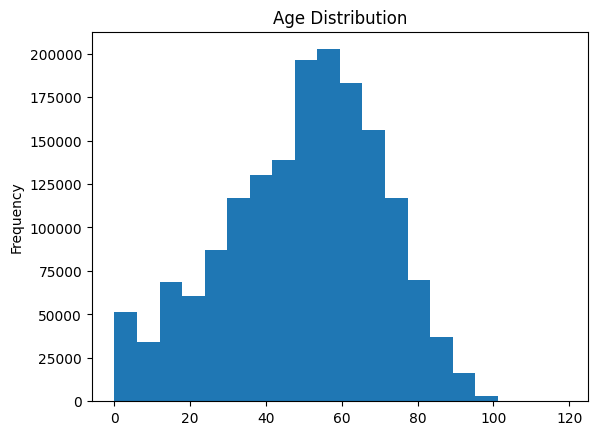

In [ ]:
master_data.AGE_YRS.plot(kind='hist', bins=20, title='Age Distribution')


<Axes: title={'center': 'Recovery Status'}, xlabel='RECOVD'>

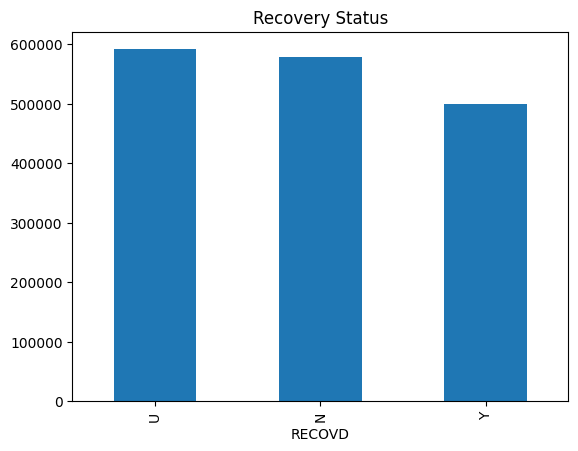

In [ ]:
master_data.RECOVD.value_counts().plot(kind='bar', title='Recovery Status')

In [ ]:
most_vax_type = master_data.VAX_TYPE.value_counts()
most_vax_type = most_vax_type.head(10)

<Axes: title={'center': 'Most Common Vaccine Types'}, xlabel='VAX_TYPE'>

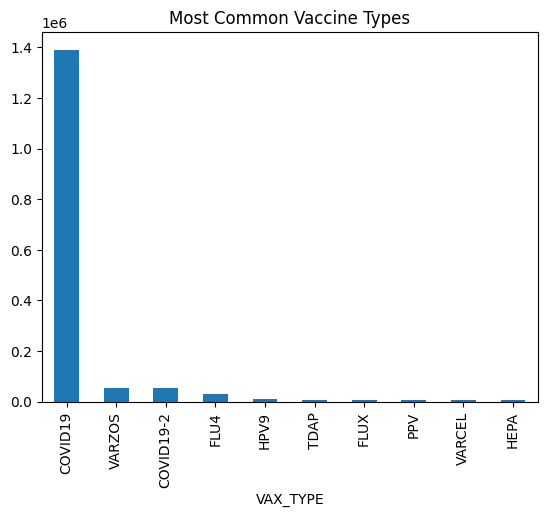

In [ ]:
most_vax_type.plot(kind='bar', title='Most Common Vaccine Types')

<Axes: title={'center': 'Dose Series'}, xlabel='VAX_DOSE_SERIES'>

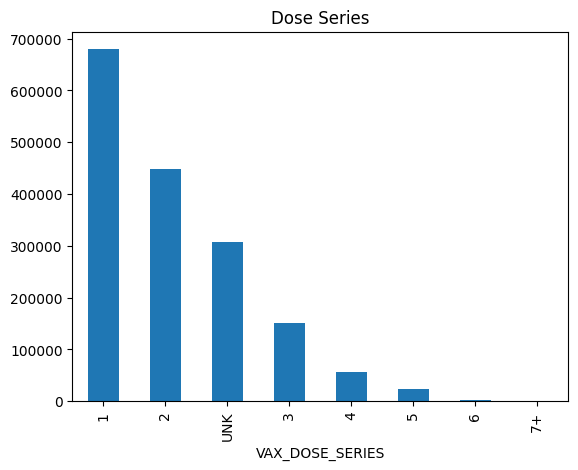

In [ ]:
master_data.VAX_DOSE_SERIES.value_counts().plot(kind='bar', title='Dose Series')

In [ ]:
import pandas as pd
import nltk  # Natural Language Toolkit
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Preprocessing
nltk.download('punkt')  # Download NLTK data if needed
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = nltk.word_tokenize(text)
    text = [word for word in text if word not in stop_words and word.isalnum()]
    text = [lemmatizer.lemmatize(word) for word in text]
    return ' '.join(text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
!pip install swifter
import swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 21.2 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=b2837f0f657d135f160bb10385b94234fabaa44e589931c9858b653e09a8628b
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [ ]:
most_symptoms=master_data.SYMPTOM_TEXT.value_counts()
most_symptoms.head(10)

,count
SYMPTOM_TEXT,
Error: Improper Storage (temperature)-,3009
Error: Improper Storage (ex. temp./location)-,2859
Narrative:,1843
VACCINE WAS STORED IN AS UNAPPROVED STORAGE UNIT,1687
None stated.,1433
Administration error mixed series mRNA vaccine Pfizer and Moderna,1377
VACCINE WAS STORED IN AN UNAPPROVED STORAGE UNIT,1305
Administration error mixed series mRNA vaccine Pfizer and Moderna.,1126
Patient vaccinated against and then tested positive for COVID19,903


In [ ]:
most_symptoms=master_data.SYMPTOM1.value_counts()
most_symptoms.head(60)

,count
SYMPTOM1,
COVID-19,86814
Chills,67131
Arthralgia,54147
Expired product administered,49020
Dizziness,40430
Fatigue,37947
Headache,34300
Asthenia,32333
No adverse event,31806


In [ ]:
##Removing rows that aren't indicitive of an adverse event in Symptom 1, 2 and 3 column

master_data = master_data[master_data["SYMPTOM1"]!="Expired product administered"]
master_data = master_data[master_data["SYMPTOM1"]!="No adverse event"]
master_data = master_data[master_data["SYMPTOM1"]!="Product storage error"]
master_data = master_data[master_data["SYMPTOM1"]!="Inappropriate schedule of product administration"]
master_data = master_data[master_data["SYMPTOM1"]!="Extra dose administered"]
master_data = master_data[master_data["SYMPTOM1"]!="Incorrect dose administered"]
master_data = master_data[master_data["SYMPTOM1"]!="Product administered to patient of inappropriate age"]
master_data = master_data[master_data["SYMPTOM1"]!="Incorrect product formulation administered"]
master_data = master_data[master_data["SYMPTOM1"]!="Interchange of vaccine products"]
master_data = master_data[master_data["SYMPTOM1"]!="Poor quality product administered"]
master_data = master_data[master_data["SYMPTOM1"]!="Wrong product administered"]
master_data = master_data[master_data["SYMPTOM1"]!="Underdose"]
master_data = master_data[master_data["SYMPTOM1"]!="Product preparation issue"]
master_data = master_data[master_data["SYMPTOM1"]!="Product preparation error"]
master_data = master_data[master_data["SYMPTOM1"]!="Interchange of vaccine products"]
master_data = master_data[master_data["SYMPTOM2"]!="Interchange of vaccine products"]
master_data = master_data[master_data["SYMPTOM2"]!="Drug ineffective"]
master_data = master_data[master_data["SYMPTOM2"]!="Vaccination failure"]
master_data = master_data[master_data["SYMPTOM3"]!="Vaccination failure"]
master_data = master_data[master_data["SYMPTOM3"]!="Vaccine breakthrough infection"]
master_data = master_data[master_data["SYMPTOM_TEXT"]!="DOSE ADMINISTERED AFTER BEING STORAGE FOR 30 DAYS BETWEEN 2-8 DEGREE C"]
master_data = master_data[master_data["SYMPTOM_TEXT"]!="temperature excursion with vaccine administered"]
master_data = master_data[master_data["SYMPTOM_TEXT"]!="DOSE ADMINISTERED AFTER BEING STORAGE FOR 30 DAYS BETWEEN 2-8 DEGREE C"]
master_data = master_data[master_data["SYMPTOM_TEXT"]!="DOSE ADMINISTERED AFTER BEING STORAGE FOR 30 DAYS BETWEEN 2-8 DEGREE C"]

master_data = master_data[master_data["NUMDAYS"]<100]



In [ ]:
most_age = master_data.AGE_YRS.value_counts()
most_age.head(100)

,count
AGE_YRS,
48.877644,45596
53.994164,36452
65.000000,22519
50.000000,21863
66.000000,21442
51.000000,21010
60.000000,20949
58.000000,20623
59.000000,20584


In [ ]:
master_data.loc[master_data['SEX'] == 'M', 'SEX'] = 'male'
master_data.loc[master_data['SEX'] == 'F', 'SEX'] = 'female'
master_data.loc[master_data['SEX'] == 'none listed','SEX'] = 'unknown'
master_data.loc[master_data['SEX'] == 'U','SEX'] = 'unknown'

In [ ]:
most_sex = master_data.SEX.value_counts()
most_sex

,count
SEX,
female,852271
male,363076
unknown,41247


In [ ]:
master_data.loc[master_data['RECOVD'] == 'Y', 'RECOVD'] = 'yes'
master_data.loc[master_data['RECOVD'] == 'N', 'RECOVD'] = 'no'
master_data.loc[master_data['RECOVD'] == 'U','RECOVD'] = 'unknown'

In [ ]:
most_recovd = master_data.RECOVD.value_counts()
most_recovd

,count
RECOVD,
no,513949
yes,396859
unknown,345786


In [ ]:
most_numdays = master_data.NUMDAYS.value_counts()
most_numdays.head(100)

,count
NUMDAYS,
0.000000,429494
1.000000,242657
2.000000,63434
58.193268,61894
54.489924,50102
3.000000,35648
7.000000,28606
4.000000,22708
57.838528,22324


In [ ]:
most_other_meds = master_data.OTHER_MEDS.value_counts()
most_other_meds.head(100)

,count
OTHER_MEDS,
None listed,539817
none,35416
unknown,9396
Unknown,7915
No,5909
NONE,5592
None.,3881
no,3159
HUMIRA,2107


In [ ]:
master_data['OTHER_MEDS'] = master_data['OTHER_MEDS'].swifter.apply(preprocess_text)
most_other_meds = master_data.OTHER_MEDS.value_counts()
most_other_meds.head(100)

Pandas Apply:   0%|          | 0/1256594 [00:00<?, ?it/s]

,count
OTHER_MEDS,
none listed,539995
none,45268
unknown,19580
,10584
multivitamin,4128
levothyroxine,3047
tylenol,2804
vitamin,2782
na,2611


In [ ]:
#Correcting inconsistencies and noise in OTHER_MEDS column from top 100 most common entries
master_data.loc[master_data['OTHER_MEDS'] == 'none','OTHER_MEDS'] = 'none listed'
master_data.loc[master_data['OTHER_MEDS'] == 'unknown','OTHER_MEDS'] = 'none listed'
master_data.loc[master_data['OTHER_MEDS'] == '','OTHER_MEDS'] = 'none listed'
master_data.loc[master_data['OTHER_MEDS'] == 'none reported','OTHER_MEDS'] = 'none listed'
master_data.loc[master_data['OTHER_MEDS'] == 'none known','OTHER_MEDS'] = 'none listed'
master_data.loc[master_data['OTHER_MEDS'] == 'na','OTHER_MEDS'] = 'none listed'
master_data.loc[master_data['OTHER_MEDS'] == 'unk','OTHER_MEDS'] = 'none listed'
master_data.loc[master_data['OTHER_MEDS'] == 'nothing','OTHER_MEDS'] = 'none listed'
master_data.loc[master_data['OTHER_MEDS'] == '0','OTHER_MEDS'] = 'none listed'
master_data.loc[master_data['OTHER_MEDS'] == 'denies','OTHER_MEDS'] = 'none listed'
master_data.loc[master_data['OTHER_MEDS'] == 'none noted','OTHER_MEDS'] = 'none listed'
master_data.loc[master_data['OTHER_MEDS'] == 'unkown','OTHER_MEDS'] = 'none listed'
master_data.loc[master_data['OTHER_MEDS'] == 'non','OTHER_MEDS'] = 'none listed'

In [ ]:
most_other_meds = master_data.OTHER_MEDS.value_counts()
most_other_meds.head(100)

,count
OTHER_MEDS,
none listed,624423
multivitamin,4128
levothyroxine,3047
tylenol,2804
vitamin,2782
humira,2361
synthroid,2342
prenatal vitamin,2088
birth control,2033


In [ ]:
most_history = master_data.HISTORY.value_counts()
most_history.head(100)

,count
HISTORY,
None listed,547187
none,54701
No,12854
Asthma,11745
Comments: Unknown,8132
Comments: List of non-encoded Patient Relevant History: Patient Other Relevant History 1: None,7803
NONE,7571
no,6935
None.,5536


In [ ]:
master_data['HISTORY'] = master_data['HISTORY'].swifter.apply(preprocess_text)
most_history = master_data.HISTORY.value_counts()
most_history.head(100)

Pandas Apply:   0%|          | 0/1256594 [00:00<?, ?it/s]

,count
HISTORY,
none listed,547520
none,68408
,23156
asthma,15904
unknown,11146
comment list nonencoded patient relevant history patient relevant history 1 none,9385
comment unknown,8177
high blood pressure,7532
hypertension,6347


In [ ]:
#Correcting inconsistencies and noise in HISTORY column from top 100 most common entries
master_data.loc[master_data['HISTORY'] == 'none','HISTORY'] = 'none listed'
master_data.loc[master_data['HISTORY'] == '','HISTORY'] = 'none listed'
master_data.loc[master_data['HISTORY'] == 'none','HISTORY'] = 'none listed'
master_data.loc[master_data['HISTORY'] == 'comment list patient relevant history patient relevant history 1 none','HISTORY'] = 'none listed'
master_data.loc[master_data['HISTORY'] == 'comment unknown','HISTORY'] = 'none listed'
master_data.loc[master_data['HISTORY'] == 'unknown','HISTORY'] = 'none listed'
master_data.loc[master_data['HISTORY'] == 'comment none','HISTORY'] = 'none listed'
master_data.loc[master_data['HISTORY'] == 'none reported','HISTORY'] = 'none listed'
master_data.loc[master_data['HISTORY'] == 'na','HISTORY'] = 'none listed'
master_data.loc[master_data['HISTORY'] == 'comment list patient relevant history patient relevant history 1 none comment patient history','HISTORY'] = 'none listed'
master_data.loc[master_data['HISTORY'] == 'm','HISTORY'] = 'none listed'
master_data.loc[master_data['HISTORY'] == 'comment list patient relevant history patient relevant history 1 none comment condition','HISTORY'] = 'none listed'
master_data.loc[master_data['HISTORY'] == 'comment unknown patient history','HISTORY'] = 'none listed'
master_data.loc[master_data['HISTORY'] == 'denies','HISTORY'] = 'none listed'
master_data.loc[master_data['HISTORY'] == '0','HISTORY'] = 'none listed'
master_data.loc[master_data['HISTORY'] == 'none noted','HISTORY'] = 'none listed'

In [ ]:
most_history = master_data.HISTORY.value_counts()
most_history.head(100)

,count
HISTORY,
none listed,668122
asthma,15904
comment list nonencoded patient relevant history patient relevant history 1 none,9385
high blood pressure,7532
hypertension,6347
comment medical history provided reporter,5278
medical historyconcurrent condition adverse event,4888
hypothyroidism,4861
diabetes,3700


In [ ]:
master_data.loc[master_data['BIRTH_DEFECT'] == 'None listed', 'BIRTH_DEFECT'] = 'no'
master_data.loc[master_data['BIRTH_DEFECT'] == 'Y', 'BIRTH_DEFECT'] = 'yes'

In [ ]:
most_birth_defect = master_data.BIRTH_DEFECT.value_counts()
most_birth_defect

,count
BIRTH_DEFECT,
no,1255461
yes,1133


In [ ]:
most_allergies = master_data.ALLERGIES.value_counts()
most_allergies.head(100)

,count
ALLERGIES,
None listed,674774
none,58170
NKDA,18974
NKA,17865
Penicillin,15990
No,15820
Sulfa,7904
no,7813
NONE,7600


In [ ]:
master_data['ALLERGIES'] = master_data['ALLERGIES'].swifter.apply(preprocess_text)
most_allergies = master_data.ALLERGIES.value_counts()
most_allergies.head(100)

Pandas Apply:   0%|          | 0/1256594 [00:00<?, ?it/s]

In [ ]:
#Correcting inconsistencies and noise in ALLERGIES column from top 100 most common entries
master_data.loc[master_data['ALLERGIES'] == 'none','ALLERGIES'] = 'none listed'
master_data.loc[master_data['ALLERGIES'] == '','ALLERGIES'] = 'none listed'
master_data.loc[master_data['ALLERGIES'] == 'nkda','ALLERGIES'] = 'none listed'
master_data.loc[master_data['ALLERGIES'] == 'nka','ALLERGIES'] = 'none listed'
master_data.loc[master_data['ALLERGIES'] == 'none known','ALLERGIES'] = 'none listed'
master_data.loc[master_data['ALLERGIES'] == 'unknown','ALLERGIES'] = 'none listed'
master_data.loc[master_data['ALLERGIES'] == 'none reported','ALLERGIES'] = 'none listed'
master_data.loc[master_data['ALLERGIES'] == 'na','ALLERGIES'] = 'none listed'
master_data.loc[master_data['ALLERGIES'] == 'none aware','ALLERGIES'] = 'none listed'
master_data.loc[master_data['ALLERGIES'] == 'none know','ALLERGIES'] = 'none listed'
master_data.loc[master_data['ALLERGIES'] == 'nkma','ALLERGIES'] = 'none listed'
master_data.loc[master_data['ALLERGIES'] == 'kna','ALLERGIES'] = 'none listed'
master_data.loc[master_data['ALLERGIES'] == 'knda','ALLERGIES'] = 'none listed'
master_data.loc[master_data['ALLERGIES'] == 'non','ALLERGIES'] = 'none listed'
master_data.loc[master_data['ALLERGIES'] == '0','ALLERGIES'] = 'none listed'
master_data.loc[master_data['ALLERGIES'] == 'denies','ALLERGIES'] = 'none listed'
master_data.loc[master_data['ALLERGIES'] == 'none noted','ALLERGIES'] = 'none listed'
master_data.loc[master_data['ALLERGIES'] == 'unk','ALLERGIES'] = 'none listed'
master_data.loc[master_data['ALLERGIES'] == 'none im aware','ALLERGIES'] = 'none listed'

In [ ]:
most_allergies = master_data.ALLERGIES.value_counts()
most_allergies.head(100)

In [ ]:
most_symptom1 = master_data.SYMPTOM1.value_counts()
most_symptom1.head(100)

In [ ]:
master_data['SYMPTOM1'] = master_data['SYMPTOM1'].swifter.apply(preprocess_text)
most_symptom1 = master_data.SYMPTOM1.value_counts()
most_symptom1.head(100)

In [ ]:
most_symptom2 = master_data.SYMPTOM2.value_counts()
most_symptom2.head(100)

In [ ]:
master_data['SYMPTOM2'] = master_data['SYMPTOM2'].swifter.apply(preprocess_text)
most_symptom2 = master_data.SYMPTOM2.value_counts()
most_symptom2.head(100)

In [ ]:
most_symptom3 = master_data.SYMPTOM3.value_counts()
most_symptom3.head(100)

In [ ]:
master_data['SYMPTOM3'] = master_data['SYMPTOM3'].swifter.apply(preprocess_text)
most_symptom3 = master_data.SYMPTOM3.value_counts()
most_symptom3.head(100)

In [ ]:
most_symptom4 = master_data.SYMPTOM4.value_counts()
most_symptom4.head(100)

In [ ]:
master_data['SYMPTOM4'] = master_data['SYMPTOM4'].swifter.apply(preprocess_text)
most_symptom4 = master_data.SYMPTOM4.value_counts()
most_symptom4.head(100)

In [ ]:
most_symptom5 = master_data.SYMPTOM5.value_counts()
most_symptom5.head(100)

In [ ]:
master_data['SYMPTOM5'] = master_data['SYMPTOM5'].swifter.apply(preprocess_text)
most_symptom5 = master_data.SYMPTOM5.value_counts()
most_symptom5.head(100)

In [ ]:
most_vax_type = master_data.VAX_TYPE.value_counts()
most_vax_type

In [ ]:
master_data['VAX_TYPE'] = master_data['VAX_TYPE'].swifter.apply(preprocess_text)
most_vax_type = master_data.VAX_TYPE.value_counts()
most_vax_type

In [ ]:
most_vax_manu = master_data.VAX_MANU.value_counts()
most_vax_manu

In [ ]:
master_data['VAX_MANU'] = master_data['VAX_MANU'].swifter.apply(preprocess_text)
most_vax_manu = master_data.VAX_MANU.value_counts()
most_vax_manu

In [ ]:
most_vax_dose_series = master_data.VAX_DOSE_SERIES.value_counts()
most_vax_dose_series

In [ ]:
master_data.loc[master_data['VAX_DOSE_SERIES'] == '1','VAX_DOSE_SERIES'] = 'one'
master_data.loc[master_data['VAX_DOSE_SERIES'] == '2','VAX_DOSE_SERIES'] = 'two'
master_data.loc[master_data['VAX_DOSE_SERIES'] == '3','VAX_DOSE_SERIES'] = 'three'
master_data.loc[master_data['VAX_DOSE_SERIES'] == '4','VAX_DOSE_SERIES'] = 'four'
master_data.loc[master_data['VAX_DOSE_SERIES'] == '5','VAX_DOSE_SERIES'] = 'five'
master_data.loc[master_data['VAX_DOSE_SERIES'] == '6','VAX_DOSE_SERIES'] = 'six'
master_data.loc[master_data['VAX_DOSE_SERIES'] == '7+','VAX_DOSE_SERIES'] = 'seven plus'
master_data.loc[master_data['VAX_DOSE_SERIES'] == 'UNK','VAX_DOSE_SERIES'] = 'unknown'

In [ ]:
most_vax_dose_series = master_data.VAX_DOSE_SERIES.value_counts()
most_vax_dose_series

In [ ]:
most_vax_route = master_data.VAX_ROUTE.value_counts()
most_vax_route

In [ ]:
master_data.loc[master_data['VAX_ROUTE'] == 'IM','VAX_ROUTE'] = 'intramuscular'
master_data.loc[master_data['VAX_ROUTE'] == 'UN','VAX_ROUTE'] = 'unknown'
master_data.loc[master_data['VAX_ROUTE'] == 'ID','VAX_ROUTE'] = 'intradermal'
master_data.loc[master_data['VAX_ROUTE'] == 'SC','VAX_ROUTE'] = 'subcutaneous'
master_data.loc[master_data['VAX_ROUTE'] == 'IN','VAX_ROUTE'] = 'intranasal'
master_data.loc[master_data['VAX_ROUTE'] == 'PO','VAX_ROUTE'] = 'per oral'
master_data.loc[master_data['VAX_ROUTE'] == 'SYR','VAX_ROUTE'] = 'needle syringe'
master_data.loc[master_data['VAX_ROUTE'] == 'JET','VAX_ROUTE'] = 'needle free jet injector device'
master_data.loc[master_data['VAX_ROUTE'] == 'OT','VAX_ROUTE'] = 'other'

In [ ]:
most_vax_route = master_data.VAX_ROUTE.value_counts()
most_vax_route

In [ ]:
master_data.AGE_YRS.plot(kind='hist', bins=20, title='Age Distribution')

In [ ]:
master_data.VAX_DOSE_SERIES.value_counts().plot(kind='bar', title='Dose Series')

<Axes: title={'center': 'Most Common Vaccine Types'}, xlabel='VAX_TYPE'>

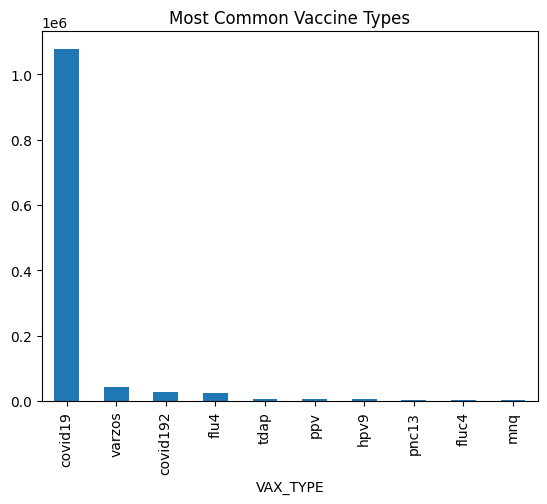

In [ ]:
most_vax_type = master_data.VAX_TYPE.value_counts()
most_vax_type = most_vax_type.head(10)
most_vax_type.plot(kind='bar', title='Most Common Vaccine Types')

<Axes: title={'center': 'Recovery Status'}, xlabel='RECOVD'>

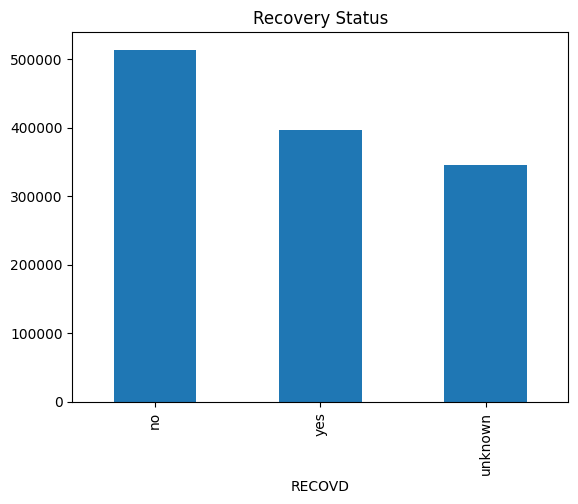

In [ ]:
master_data.RECOVD.value_counts().plot(kind='bar', title='Recovery Status')

<Axes: title={'center': 'Adverse Event Onset Time (Days)'}, ylabel='Frequency'>

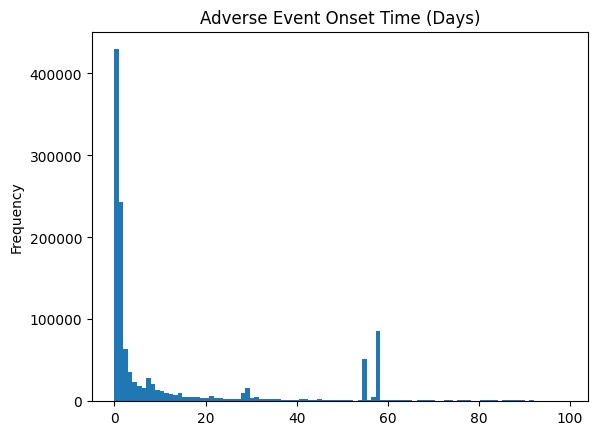

In [ ]:
master_data.NUMDAYS.sort_values().plot(kind='hist', bins=100, title='Adverse Event Onset Time (Days)')

In [ ]:
master_data_covid = master_data[master_data["VAX_TYPE"]=="covid19"]
master_data_covid.head()

master_data_covid = master_data[master_data["VAX_TYPE"]=="covid19"]
master_data_covid.head()

,VAERS_ID,AGE_YRS,SEX,SYMPTOM_TEXT,RECOVD,NUMDAYS,OTHER_MEDS,HISTORY,BIRTH_DEFECT,ALLERGIES,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE
54861,902418,56.0,female,Patient experienced mild numbness traveling fr...,yes,0.0,latex,none listed,no,none listed,hypoaesthesia,injection site hypoaesthesia,none,none,none,covid19,pfizerbiontech,one,intramuscular
54881,902440,35.0,female,C/O Headache,yes,0.0,none listed,none listed,no,none listed,headache,none,none,none,none,covid19,pfizerbiontech,one,needle syringe
54888,902446,55.0,female,"felt warm, hot and face and ears were red and ...",yes,0.0,novasc hydrochlorothiazide synthroid lisinopri...,hypertension sleep apnea hypothyroidism,no,contrast dye iv contrast shellfish strawberry,erythema,feeling hot,flushing,none,none,covid19,pfizerbiontech,one,intramuscular
54909,902464,42.0,male,within 15 minutes progressive light-headedness...,yes,0.0,none listed,none listed,no,none listed,dizziness,electrocardiogram normal,hyperhidrosis,laboratory test normal,presyncope,covid19,pfizerbiontech,unknown,intramuscular
54910,902465,60.0,female,Pt felt wave come over body @ 1218 starting in...,no,0.0,lisinopril hctz lipitor amyitrypline lexapro v...,hypertension fibromyalgia,no,biaxin,dysgeusia,oral pruritus,paraesthesia,paraesthesia oral,parosmia,covid19,pfizerbiontech,one,intramuscular


In [ ]:
master_data_training = master_data.drop(columns=['SYMPTOM_TEXT'])
master_data_training.to_csv('/content/drive/MyDrive/DATA606 Project/master_data_training.csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATA606 Project/master_data_training.csv')

In [ ]:
!pip install openai

In [ ]:
import os
os.environ["OPENAI_API_KEY"] = "******"

In [ ]:
from openai import OpenAI
client = OpenAI()
completion = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "user", "content": "write a haiku about ai"}
    ]
)

In [ ]:
!pip install langchain_experimental

In [ ]:
import pandas as pd
from langchain_experimental.agents import create_pandas_dataframe_agent
from langchain.llms import OpenAI

# Create the agent
agent = create_pandas_dataframe_agent(OpenAI(temperature=0), df, verbose=True, allow_dangerous_code=True)

# Interact with the chatbot
while True:
    query = input("Enter your question: ")
    response = agent.run(query)
    print(response)

Enter your question: What is the most common vaccine type?


> Entering new AgentExecutor chain...
Thought: I need to find the value counts for the "VAX_TYPE" column and then select the highest count.
Action: python_repl_ast
Action Input: df["VAX_TYPE"].value_counts()VAX_TYPE
covid19       1077341
varzos          43798
covid192        28097
flu4            23507
tdap             6384
ppv              6194
hpv9             5297
pnc13            4468
fluc4            4148
mnq              4032
mmr              3786
varcel           3711
rsv              3497
flua4            3268
hep              3240
menb             3005
hepa             2701
pnc20            2639
flux             2360
dtap             2184
mmrv             2163
dtapipv          1926
hibv             1915
flur4            1801
smallmnk         1577
rv5              1530
dtaphepbip       1248
dtapipvhib       1216
ipv              1069
typ               929
rab               670
flu3              654
rv1               6

KeyboardInterrupt: Interrupted by user